![CSTR Diagram](../assets/Image_README.png)

# **CSTR Simulator**

A modular, GUI-integrated simulator for continuous stirred-tank reactors (CSTRs) with recycle loop, temperature optimization, and real industrial case studies.

This notebook was created as a collaborative project for the **EPFL** course *Practical Programming in Chemistry* (**CHE-200**).

---

## Introduction

The following Jupyter notebook presents the CSTR-Desktop project. It is a simulation of a continuous stirred-tank reactor, a common model for a chemical reactor in chemical engineering. The principle of the project is that, starting from a chemical reaction and some data about this reaction, it is possible to determine the optimal conditions, composition of the outlet flow and yield as if it was done industrially.

---

## Why a Continuous Flow Stirred Reactor?

Initially, it was planned to first simulate a batch reactor for simple industrial reactions and then expand the project to include series of batch reactors to simulate more complexe multiple steps synthesis. This idea was eventually abandonned due to difficulties to implement multiple reactors in the code and still making it work. 
The idea was then to focus on only one reactor and adding more details than it was previously planned with the series of batch reactors. The CSTR model was chosen due to its common use and significance in chemical engineering.
A CSTR consists of one tank were reactants are continuously fed and mixed uniformly. They are very commonly used due to their simplicity, ability to operate at steady state and are very useful for reactions that require constant temperature and concentration.
<center>
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/Cstr.png" alt="CSTR Diagram" width="400"/>
</center>
By using thermodynamic and kinetic principles, the goal was to be as close as possible as real life industry. The code was mainly composed of applications of thermodynamic and kinetic laws as well as mass balance resolutions. Floor and ceiling values were used on multiple parameters in order to obtain values that were physically realistic.

---

## Difficulties 
At first, we wanted to create a web scraper to find the data necessary for the program to run. This was done separatly from the main code of the project. While it seemed to be working just fine on its own, when we tried to combine the codes together the scraper would not work anymore. Due to difficulties of adaptation we endend up chosing to hard code a database of 40 common reactions in industrial chemistry into the final program. It should still be possible to modify the code in order to have a proper scraper and therefore increasing greatly the number of simulations.
Another difficulty we came across was that for some reactions the yield given was zero. This could be explained by the fact that some of the parameters given were larger or smaller than ceiling values and therefore the code would act as if the conditions for the reaction to happen would not be achivable within our limits. Since we didn't want to compromise the integrity of the results that were already working we decided to not modify the floor and ceiling values. Therefore in the final interface some reactions seem to not be working. This could also be explain by the fact that our project does not optimize other parameters like pressure, the choice of catalyst was also not optimized and was chosen for generally corresponding reactions (e.g. a platinum catalyst for an hydrogenation). 

---

## Limitations
One of the limitations of this program is that it of course doesn't fully represent a real life case. It simplifies or omits some aspects that are not ignorable in a real life reactor.
1. Modeling and physical assumptions
   Here we assume perfect mixing, ideal gas behavior and steady-state state while these conditions do not always occur in practice. We also did not take into account the potential heat loss/gain with the environment surrounding the reactor and did not optimize the coolant or insulation which is very important for efficiency and security in chemical engineering.
2. Kinetics
   In our project the kinetics are simplified and complex reaction mechanisms or side reactions are not modeled. We also assume that activation energy and frequency factors are constant and do not take into account catalyst degradation.
3. Process Engineering
   Here we assume no mass transfer limitations and that the reactants are instantly available but in real life mass transfer can limit the rate of reaction. The safety and degradation of the reactor was also not modeled not taking into account potential hot spots due to heat transfer, overpressure due to steam formation or feed pump pressure. We did not also describe in detail the recycle stream and considered it as a simple concentration split while real life separation units are more complex. We also assumed that most parameters behaved the same at industrial scale as it would at smaller experimental scale. We also did not include cost optimization of the process. The CSTR model is also not optimal for every type of reaction done industrially, other models like batch/semi-batch reactors, or plug flow reactors could be more efficient for some cases.
4. Chemical limitations
   From a chemical point of view the main limitation is that this program assumes one step reactions and will therefore not work for more complex multiple steps reactions which would need series of reactors to be achievable which was not modeled in our project.

---

## 🔧 Key Functions of the `CSTRSimulator` Class

This section presents and tests the most important built-in methods of the `CSTRSimulator` class.  
Each function plays a central role in simulating the behavior of a continuous stirred-tank reactor (CSTR), including performance evaluation, kinetics, and efficiency metrics.

For each function, you will find:
- a short explanation of why it matters,
- the Python code to test it with concrete input values,
- and the expected output.

In [ ]:
import sys, os
sys.path.append(os.path.abspath("../src"))

from projet_chem200.cstr_simulator.functions import CSTRSimulator

# Création de l'instance du simulateur
sim = CSTRSimulator()

# Set the components used in your reactions (required for internal methods)
sim.components = ["A", "B"]  # You can add more if needed, like "C", "D", etc.

### 1. `calculate_conversion`

🔍 Why it's important:

Conversion tells us **how much of the initial reactant was consumed** inside the reactor.  
It is a key performance metric to assess **reactor efficiency** and **compare operating conditions**.

In [24]:
inlet = {"A": 1.0}    # Inlet concentration (mol/L)
outlet = {"A": 0.3}   # Outlet concentration (mol/L)

X = sim.calculate_conversion(inlet_conc=inlet, outlet_conc=outlet)
print("Conversion of A =", X["A"])

Conversion of A = 0.7


### 2. `calculate_yield`

🔍 Why it's important:

The yield tells us **how much of the desired product is obtained** compared to the amount of reactant consumed.  
It is critical for evaluating **reaction efficiency** and **selectivity** in industrial processes.

In [32]:
from projet_chem200.cstr_simulator.functions import CSTRSimulator

# 1. Create the simulator instance
sim = CSTRSimulator()

# 2. Define components and target product
sim.components = ["A", "B"]
sim.target_product = "B"
sim.recycle_ratio = 0.0  # Required to avoid AttributeError

# 3. Define a simple reaction: A → B
sim.reactions = [
    {
        "stoichiometry": {"A": -1, "B": 1},
        "reactants": ["A"],
        "products": ["B"]
    }
]

# 4. Set inlet and outlet concentrations
inlet = {"A": 1.0, "B": 0.0}
outlet = {"A": 0.3, "B": 0.7}

sim.feed_composition = inlet      # Required for theoretical yield calculation
sim.concentrations = outlet       # Simulated outlet concentrations

# 5. Calculate yield
Y = sim.calculate_yield(product="B")
print("Yield of B =", Y)

Yield of B = 0.7


### 3. `reaction_rate` (via `sim.rate_law`)

🔍 Why it's important:

The reaction rate determines **how fast the chemical reaction proceeds** inside the reactor.  
It is essential for **dimensioning the reactor**, calculating **product formation rates**, and analyzing **temperature or concentration effects**.  
In this simulator, the rate law is manually defined using a lambda function.

In [37]:
from projet_chem200.cstr_simulator.functions import CSTRSimulator

# 1. Create the simulator
sim = CSTRSimulator()

# 2. Define the reaction data
reaction = {
    "frequency_factor": 1e7,                # A (1/s)
    "activation_energy": 80000,            # Ea (J/mol)
    "reaction_order": {"A": 1, "B": 1},     # r = k * [A]^1 * [B]^1
}

# 3. Define concentrations and temperature
component_conc = {"A": 0.5, "B": 0.4}  # mol/L
temp = 350  # K

# 4. Call the method
r = sim.reaction_rate(component_conc, temp, reaction)
print("Reaction rate =", r, "mol/L/s")

Reaction rate = 2.297483991329831e-06 mol/L/s


### 4. `solve_steady_state`

🔍 Why it's important:

This function calculates the **steady-state concentrations** in the reactor for a given feed, temperature, volume, and recycle ratio.

It is the **core engine** of the CSTR simulator, iteratively computing the final concentrations using:
- the specified **reaction kinetics** (`reaction_rate`)
- **flow and volume conditions**
- optional **recycle stream**

It stops when the system reaches convergence or the maximum number of iterations.

In [51]:
from projet_chem200.cstr_simulator.functions import CSTRSimulator

# 1. Create simulator instance
sim = CSTRSimulator()

# 2. Define reaction
sim.reactions = [{
    "stoichiometry": {"A": -1, "B": 1},
    "reactants": ["A"],
    "products": ["B"],
    "frequency_factor": 1e10,           # A
    "activation_energy": 80000,       # Ea (J/mol)
    "reaction_order": {"A": 1},       # r = k * [A]
}]

# 3. Set required components
sim.components = ["A", "B"]
sim.feed_composition = {"A": 1.0, "B": 0.0}

# 4. Set reactor parameters (CORRECTED)
sim.set_parameters(
    feed_composition={"A": 1.0, "B": 0.0},
    reactions=sim.reactions,
    volume=1.0,         # m³
    temperature=350,    # K
    flow_rate=0.1       # m³/s
)

# 5. Solve for steady state
sim.solve_steady_state()

# 6. Display final concentrations
print("Steady-state concentrations:")
for comp, value in sim.concentrations.items():
    print(f"{comp} = {value:.4f} mol/L")

Steady-state concentrations:
B = 0.1149 mol/L
A = 0.8851 mol/L


### 5. `_verify_mass_balance`

🔍 Why it's important:

This internal method checks that the **elemental mass balance** is respected between the inlet and outlet streams.  
It is especially useful when multiple reactions or recycle streams are involved, and acts as a diagnostic tool to validate steady-state results.

In [52]:
# Use the internal function to verify mass balance at steady state

# Re-use inlet and outlet concentrations from earlier simulation
inlet = {"A": 1.0, "B": 0.0}
outlet = sim.concentrations          # steady-state concentrations
reaction = sim.reactions[0]          # current reaction in simulation

# Call internal verification method
sim._verify_mass_balance(inlet_conc=inlet, outlet_conc=outlet, reaction=reaction)

print("Mass balance verification completed successfully.")

Mass balance verification completed successfully.


### 6. `optimize_temperature`

🔍 Why it's important:

This function finds the **optimal temperature** that maximizes the yield of the target product.  
It uses a combination of **grid search** and **local optimization** to avoid getting stuck in poor local minima.

It calls:
- `solve_steady_state(temperature)` to simulate the reactor at each trial temperature,
- `calculate_yield()` to evaluate performance,
- and returns the temperature that gives the best result.

It is essential for analyzing **temperature sensitivity**, optimizing **reaction conditions**, and improving **reactor performance**.

In [54]:
from projet_chem200.cstr_simulator.functions import CSTRSimulator

# 1. Create simulator and define a reaction
sim = CSTRSimulator()
reaction = {
    "stoichiometry": {"A": -1, "B": 1},
    "reactants": ["A"],
    "products": ["B"],
    "frequency_factor": 1e10,
    "activation_energy": 80000,
    "reaction_order": {"A": 1},
    "reversible": False
}
sim.reactions = [reaction]

# 2. Set simulation parameters
sim.set_parameters(
    volume=1.0,
    temperature=300,
    flow_rate=0.1,
    reactions=sim.reactions,
    feed_composition={"A": 1.0, "B": 0.0},
    target_product="B"
)

# 3. Run temperature optimization
optimal_temp = sim.optimize_temperature(bounds=(300, 700))
print(f"Optimal temperature = {optimal_temp:.2f} K")

# 4. Show final yield at that temperature
final_yield = sim.calculate_yield()
print(f"Final yield at optimal T = {final_yield:.3f}")

Optimal temperature = 388.89 K
Final yield at optimal T = 1.000


### 7. `run_simulation`

🔍 Why it's important:

This is the **top-level simulation function**.  
It combines all key steps of the simulator:

- solving the steady state,
- optimizing the temperature,
- calculating product yield, reaction rates, and conversions,
- computing recycle and mass balance,
- and returning a complete summary of results.

It allows for **automated, end-to-end CSTR simulation** in one command.

In [ ]:
from projet_chem200.cstr_simulator.functions import CSTRSimulator

# 1. Create the simulator
sim = CSTRSimulator()

# 2. Define a basic irreversible reaction A → B
reaction = {
    "name": "A to B simple",
    "stoichiometry": {"A": -1, "B": 1},
    "reactants": ["A"],
    "products": ["B"],
    "frequency_factor": 2e7,          
    "activation_energy": 100000,        
    "reaction_order": {"A": 1},
    "reversible": False                
}
sim.reactions = [reaction]

# 3. Set parameters
sim.set_parameters(
    volume=1.0,                       
    temperature=550,               
    flow_rate=0.05,                   
    reactions=[reaction],
    feed_composition={"A": 1.0, "B": 0.0},  
    target_product="B"
)

# 4. Run the simulation 
results = sim.run_simulation(optimize_temp=False)

# 5. Print the results
sim.print_results(results)

### 8. `create_visualization`

🧭 Why it’s important:

This method **generates plots** that visually summarize the CSTR simulation:

- Bar chart of final concentrations  
- Temperature vs Yield curve  
- Comparison of feed, recycle, and outlet compositions  
- Reactant conversions

It allows for fast analysis and presentation of simulation outcomes.

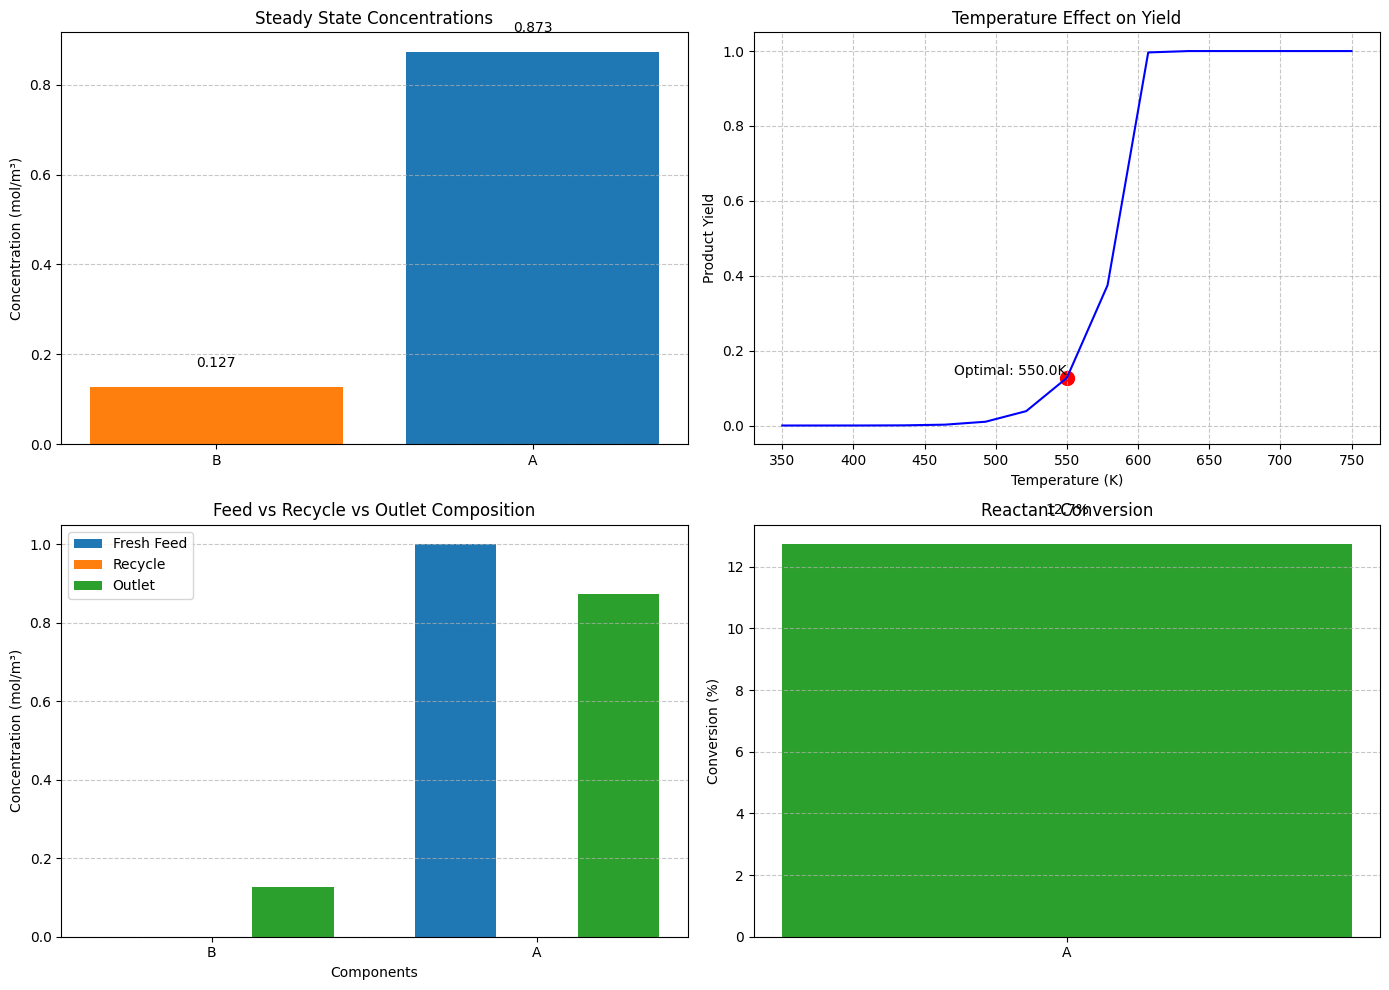

In [82]:
import matplotlib.pyplot as plt
fig, axes = sim.create_visualization(results)
plt.show()